<a href="https://colab.research.google.com/github/utkarshg1/Neural-Net-Datasets/blob/main/Regression_With_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Keras

Attribute Information:
Features consist of hourly average ambient variables

1. Temperature (T) in the range 1.81°C and 37.11°C,
2. Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
3. Relative Humidity (RH) in the range 25.56% to 100.16%
4. Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
5. Net hourly electrical energy output (EP) 420.26-495.76 MW


# Step 1 : Read the dataset

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Step 2: Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


### Step 3: Seperating X and Y(PE)

In [7]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [8]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


### Step 4: apply preprocessing on X

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [11]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


### Step 5: Apply train test split

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [13]:
xtrain.head()

,AT,V,AP,RH
5487,0.749961,0.721180,-0.329896,-0.486248
3522,0.864023,1.266539,-0.984946,0.826125
6916,0.936486,1.524659,0.318419,0.809686
7544,1.665141,1.380647,-0.902434,-1.155449
7600,1.214260,1.364121,-1.035464,-0.236924


In [14]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [15]:
xtest.head()

,AT,V,AP,RH
2513,1.348451,0.239564,-1.284687,-1.093118
9411,0.813030,1.364121,-0.742460,0.274052
8745,-0.244392,-0.738619,1.983830,-0.186923
9085,-1.367568,-1.015627,2.276835,0.977500
4950,1.375289,0.825058,0.613107,-1.717111


In [16]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


In [18]:
xtrain.shape

(7654, 4)

In [19]:
xtrain.shape[1]

4

# Step 5 : Build the Neural Network

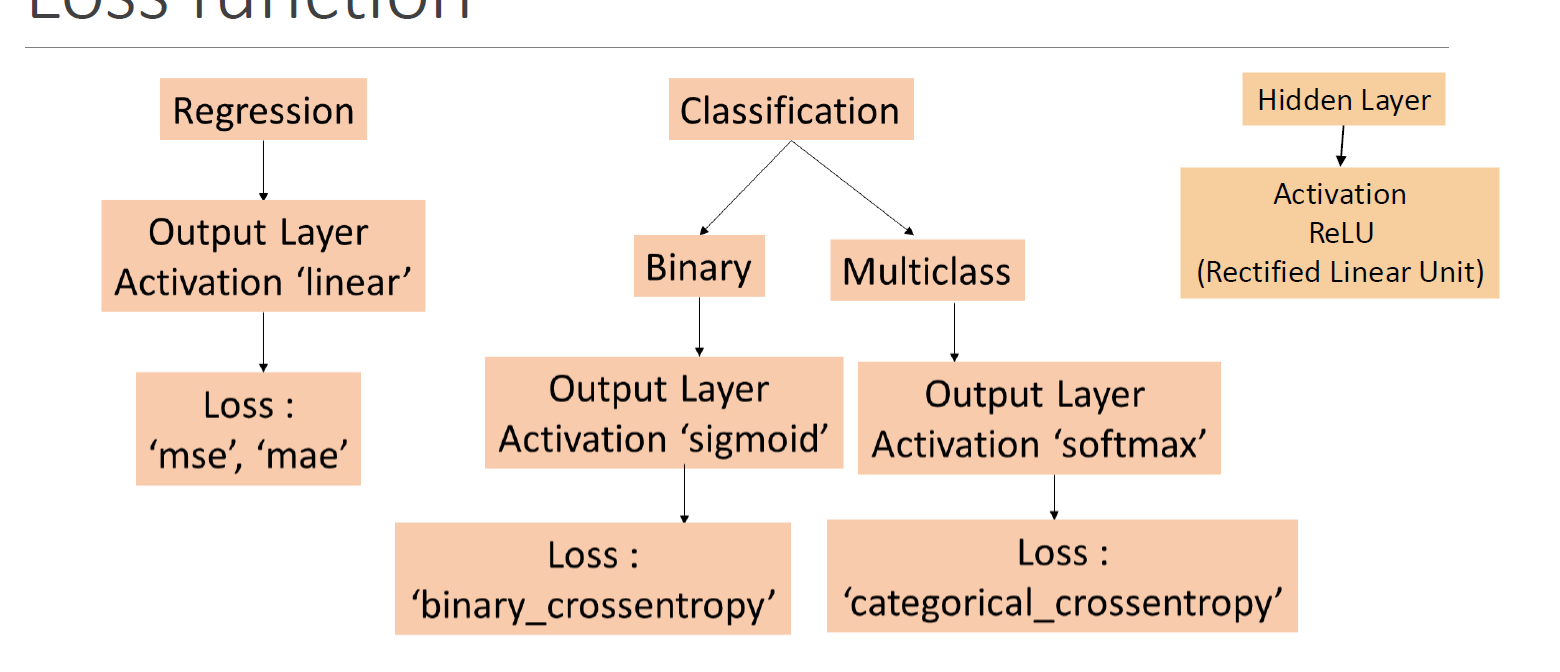

In [20]:
from keras.models import Sequential
from keras.layers import Input, Dense

In [21]:
# Initialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add Hidden Layer 1
model.add(Dense(units=64, activation='relu'))
# Add Hidden Layer 2
model.add(Dense(units=32, activation='relu'))
# Add Output Layer
model.add(Dense(units=1, activation='linear'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2433 (9.50 KB)
Trainable params: 2433 (9.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

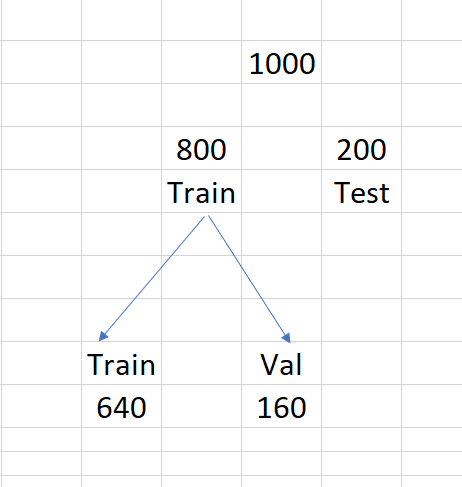

In [25]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=50)

Epoch 1/50
192/192 [==============================] - 2s 3ms/step - loss: 188346.1719 - mae: 432.9932 - val_loss: 137861.0000 - val_mae: 370.1548
Epoch 2/50
192/192 [==============================] - 0s 3ms/step - loss: 61661.0117 - mae: 223.2438 - val_loss: 20810.0566 - val_mae: 122.2438
Epoch 3/50
192/192 [==============================] - 1s 3ms/step - loss: 14964.8730 - mae: 102.7605 - val_loss: 10768.4727 - val_mae: 87.4118
Epoch 4/50
192/192 [==============================] - 0s 2ms/step - loss: 7353.1812 - mae: 71.3067 - val_loss: 4734.4692 - val_mae: 57.2014
Epoch 5/50
192/192 [==============================] - 0s 2ms/step - loss: 3091.1567 - mae: 45.1910 - val_loss: 1929.5669 - val_mae: 35.5324
Epoch 6/50
192/192 [==============================] - 0s 2ms/step - loss: 1343.7516 - mae: 29.1642 - val_loss: 922.0493 - val_mae: 23.8782
Epoch 7/50
192/192 [==============================] - 0s 2ms/step - loss: 701.0493 - mae: 20.6758 - val_loss: 526.0118 - val_mae: 17.7018
Epoch 8/50

# Step 6 : Plot the learning curve for the model

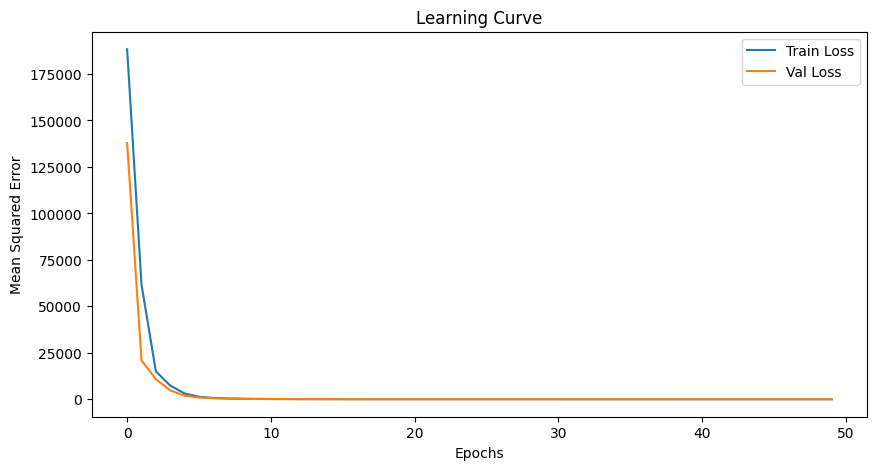

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Step 7 : Evaluate the model

In [28]:
model.evaluate(xtrain, ytrain)

240/240 [==============================] - 1s 4ms/step - loss: 18.9160 - mae: 3.3927


[18.916034698486328, 3.3927040100097656]

In [29]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 3ms/step - loss: 17.7611 - mae: 3.3194


[17.761123657226562, 3.3194262981414795]

In [30]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 2ms/step


In [31]:
ypred_train[0:5]

array([[441.62427],
       [434.8368 ],
       [435.70782],
       [431.40314],
       [433.17682]], dtype=float32)

In [32]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [33]:
ypred_test[0:5]

array([[434.72473],
       [436.62555],
       [462.9249 ],
       [478.04486],
       [438.106  ]], dtype=float32)

In [34]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_model(model, x, y):
  ypred = model.predict(x)
  mse = mean_squared_error(y, ypred)
  rmse = mse**(1/2)
  mae = mean_absolute_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f'Mean Squared Error : {mse:.2f}')
  print(f'Root Mean Squared Error : {rmse:.2f}')
  print(f'Mean Absolute Error : {mae:.2f}')
  print(f'R2 score : {r2:.4f}')

In [36]:
evaluate_model(model, xtrain, ytrain)

240/240 [==============================] - 1s 4ms/step
Mean Squared Error : 18.92
Root Mean Squared Error : 4.35
Mean Absolute Error : 3.39
R2 score : 0.9353


In [37]:
evaluate_model(model, xtest, ytest)

60/60 [==============================] - 0s 2ms/step
Mean Squared Error : 17.76
Root Mean Squared Error : 4.21
Mean Absolute Error : 3.32
R2 score : 0.9379


### Above model is very good because R2 score in train and test is more 0.8

# Saving model for future use

In [38]:
model.save('PowerPlantReg.keras')

# Load the model object

In [39]:
from keras.models import load_model
m = load_model('/content/PowerPlantReg.keras')
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2433 (9.50 KB)
Trainable params: 2433 (9.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
